<a href="https://colab.research.google.com/github/PALLADIUM26/ML/blob/main/ML1_lrgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.	Perform linear regression algorithm to predict
a.	The price of a used car. 	Dataset: Used_Car_dataset.csv
b.	The price of a House.  	Dataset: Housing_price_dataset.csv
c.	CO2 Emission	 		Dataset: FuelConsumption_dataset.csv
Consider both univariate and multivariate cases for these problems. Elaborate gradient descent algorithm and hyper-parameter tuning for the best result with predefined convergent criteria. Display the hypothesis function and find the accuracy of the linear regression in predicting the correct price.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/FuelConsumption.csv')
print(df.head())

   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   

In [ ]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        predictions = X.dot(theta)
        error = predictions - y
        gradient = (1/m) * X.T.dot(error)
        theta -= alpha * gradient
        cost = (1/(2*m)) * np.sum(error ** 2)
        cost_history.append(cost)
        if len(cost_history) > 1 and abs(cost_history[-1] - cost_history[-2]) < 1e-6:
            break
    return theta, cost_history

In [ ]:
def evaluate(X, y, theta):
    predictions = X.dot(theta)
    mse = mean_squared_error(y, predictions)
    r2 = r2_score(y, predictions)
    return mse, r2

In [ ]:
print("\n--- Univariate Linear Regression ---")
X_uni = df[['ENGINESIZE']].values
y_uni = df[['CO2EMISSIONS']].values
X_uni = np.c_[np.ones(X_uni.shape[0]), X_uni]
X_train_uni, X_test_uni, y_train_uni, y_test_uni = train_test_split(X_uni, y_uni, test_size=0.2, random_state=4)



--- Univariate Linear Regression ---


In [ ]:
theta_uni = np.zeros((X_uni.shape[1], 1))
alpha = 0.01
iterations = 1000
theta_uni_final, cost_history_uni = gradient_descent(X_train_uni, y_train_uni, theta_uni, alpha, iterations)

In [ ]:
# Print hypothesis
print(f"Hypothesis: h(x) = {theta_uni_final[0][0]:.2f} + {theta_uni_final[1][0]:.2f} * EngineSize")
# Accuracy
mse_uni, r2_uni = evaluate(X_test_uni, y_test_uni, theta_uni_final)
print(f"MSE: {mse_uni:.2f}, R²: {r2_uni:.2f}")


Hypothesis: h(x) = 99.40 + 45.72 * EngineSize
MSE: 791.17, R²: 0.79


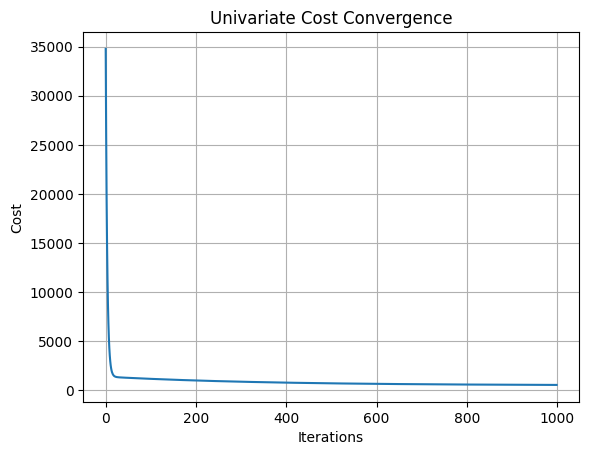

In [ ]:
# Plot cost
plt.plot(cost_history_uni)
plt.title("Univariate Cost Convergence")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()


In [ ]:
print("\n--- Multivariate Linear Regression ---")
X_multi = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']].values
y_multi = df[['CO2EMISSIONS']].values
X_multi = np.c_[np.ones(X_multi.shape[0]), X_multi]
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)
theta_multi = np.zeros((X_multi.shape[1], 1))
theta_multi_final, cost_history_multi = gradient_descent(X_train_multi, y_train_multi, theta_multi, alpha, iterations)



--- Multivariate Linear Regression ---


In [ ]:
# Print hypothesis
print("Hypothesis: h(x) = {:.2f} + {:.2f}*ENGINESIZE + {:.2f}*CYLINDERS + {:.2f}*FUELCONSUMPTION_COMB"
      .format(*theta_multi_final.flatten()))
# Accuracy
mse_multi, r2_multi = evaluate(X_test_multi, y_test_multi, theta_multi_final)
print(f"MSE: {mse_multi:.2f}, R²: {r2_multi:.2f}")

Hypothesis: h(x) = 29.46 + -1.00*ENGINESIZE + 15.90*CYLINDERS + 11.79*FUELCONSUMPTION_COMB
MSE: 546.10, R²: 0.87


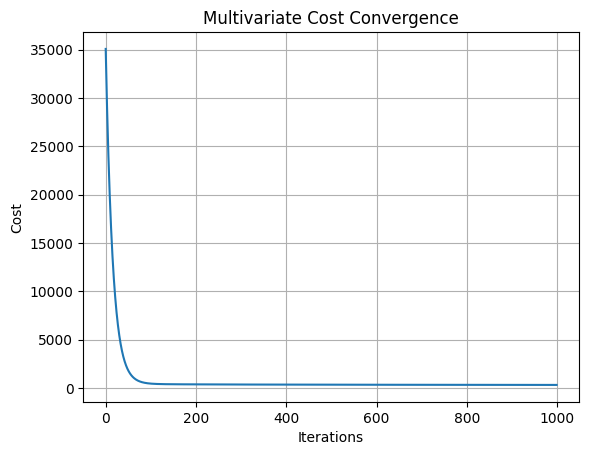

In [ ]:
# Plot cost
plt.plot(cost_history_multi)
plt.title("Multivariate Cost Convergence")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()
